<a href="https://colab.research.google.com/github/shstreuber/AI/blob/main/Week7_RNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The Problem with Feed-Forward Neural Networks**
So far, you have used Neural Networks to analyze data and perform classifications based on their analysis--classifications of numbers, images, and the like.

Remember the code below from [one of the very first neural networks you encountered in this class](https://github.com/shstreuber/AI/blob/main/Week1_EasyEquationNN5.ipynb)?

**TO DO**: Execute this code 5 times in a row:

In [6]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

# Sample Data
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-1.0,  1.0, 3.0, 5.0, 7.0, 9.0], dtype=float)

# The Basic Model
model = tf.keras.Sequential([tf.keras.Input([1]), keras.layers.Dense(units=1)])
model.compile(optimizer='sgd', loss='mean_squared_error')

# Train the Model with 10 epochs
model.fit(xs, ys, epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - loss: 20.0707
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 15.8103
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 12.4580
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 9.8202
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 7.7445
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 6.1111
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 4.8256
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 3.8139
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 3.0176
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 2.3907


Compare the outputs of all 5 runs. Does the learning improve from run 1 to run 5? How can we improve the the model? Record your thoughts below:

#**The Solution: Recurrent Neural Networks**
A recurrent neural network (RNN) is the type of artificial neural network that is used in Apple’s Siri and Google’s voice search. At a high level, a recurrent neural network (RNN) processes sequences — whether daily stock prices, sentences, or sensor measurements — one element at a time while retaining a **memory** (called a state) of what has come previously in the sequence.

<img src="https://github.com/shstreuber/Data-Mining/blob/master/images/Structure-of-simple-recurrent-neural-network-RNN-and-unfolded-RNN.png?raw=true">

**How It Works**:
1. **Inputs & Hidden State**: At each step, the RNN receives an input *x* and combines it with information from the previous step (stored in a hidden state *h*).
2. **Recurrence**: This hidden state is passed to the next time step, allowing the network to retain context from earlier inputs.
3. **Output**: The network processes all steps and produces an output, such as predicting the next word in a sentence or forecasting stock prices.

##**Limitations**
Simple RNN models usually run into two major issues. These issues are related to gradient, which is the slope of the loss function along with the error function.

1. [Vanishing Gradient problem](https://aiml.com/what-do-you-mean-by-vanishing-and-exploding-gradient-problem-and-how-are-they-typically-addressed/) occurs when the gradient becomes so small that updating parameters becomes insignificant; eventually the algorithm stops learning:

<img src ="https://camo.githubusercontent.com/50601245fe1be8ab8a254056e6f7cd26ce2eb4c29dfe4adcc10363def93ae380/68747470733a2f2f7777772e6b646e7567676574732e636f6d2f77702d636f6e74656e742f75706c6f6164732f76616e697368696e672d6772616469656e742d70726f626c656d2d31322e706e67" height =200>

Imagine it like playing [silent post](https://actiwity.com/details/silentpost).

2. [Exploding Gradient problem](https://aiml.com/what-do-you-mean-by-vanishing-and-exploding-gradient-problem-and-how-are-they-typically-addressed/) occurs when the gradient becomes too large, which makes the model unstable.
<img src = "https://aiml.com/wp-content/uploads/2023/11/vanishing-and-exploding-gradient-1.png" height=200>

In this case, larger error gradients accumulate, and the model weights become too large. This issue can cause longer training times and poor model performance. It is less common than the Vanishing Gradient.

Watch this video to understand how these two concepts operate:

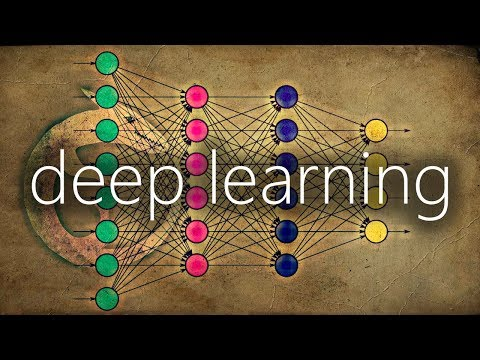

In [8]:
from IPython.display import YouTubeVideo
YouTubeVideo('qO_NLVjD6zE', width=600, height=400)

Advanced RNN architectures such as LSTM and GRU mitigate the Vanishing Gradient problem. That's what we will see next.

#**MasterCard Stock Price Prediction Using LSTM & GRU**
Below, we will use Kaggle’s MasterCard stock dataset from May-25-2006 to Oct-11-2021 to train an LSTM and a GRU model to forecast the stock price. As before, we will start with an Exploratory Data Analysis and data preprocessing and then build and train each model. We will also evaluate which model works best.

##**0. Importing the Libraries and the Data**

In [10]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from tensorflow.random import set_seed
set_seed(455)
np.random.seed(455)

dataset = pd.read_csv(
    "https://raw.githubusercontent.com/shstreuber/Data-Mining/refs/heads/master/data/Mastercard_stock_history.csv", index_col="Date", parse_dates=["Date"]
).drop(["Dividends", "Stock Splits"], axis=1)
print(dataset.head())

                Open      High       Low     Close     Volume
Date                                                         
2006-05-25  3.748967  4.283869  3.739664  4.279217  395343000
2006-05-26  4.307126  4.348058  4.103398  4.179680  103044000
2006-05-30  4.183400  4.184330  3.986184  4.093164   49898000
2006-05-31  4.125723  4.219679  4.125723  4.180608   30002000
2006-06-01  4.179678  4.474572  4.176887  4.419686   62344000


##**1. Exploratory Data Analysis (EDA)**

In [11]:
dataset.describe()

,Open,High,Low,Close,Volume
count,3872.000000,3872.000000,3872.000000,3872.000000,3.872000e+03
mean,104.896814,105.956054,103.769349,104.882714,1.232250e+07
std,106.245511,107.303589,105.050064,106.168693,1.759665e+07
min,3.748967,4.102467,3.739664,4.083861,6.411000e+05
25%,22.347203,22.637997,22.034458,22.300391,3.529475e+06
50%,70.810079,71.375896,70.224002,70.856083,5.891750e+06
75%,147.688448,148.645373,146.822013,147.688438,1.319775e+07
max,392.653890,400.521479,389.747812,394.685730,3.953430e+08


In [12]:
dataset.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0


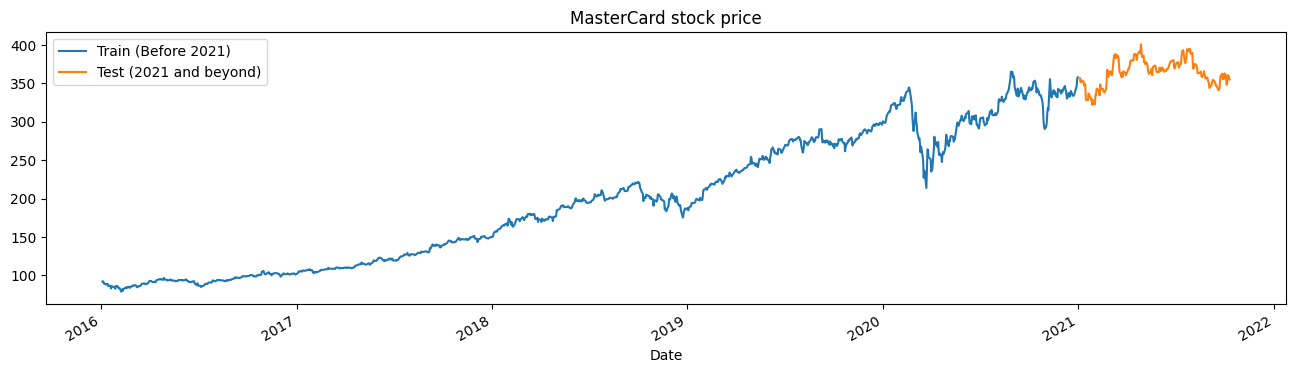

In [13]:
# Checking the data distribution
tstart = 2016
tend = 2020

def train_test_plot(dataset, tstart, tend):
    dataset.loc[f"{tstart}":f"{tend}", "High"].plot(figsize=(16, 4), legend=True)
    dataset.loc[f"{tend+1}":, "High"].plot(figsize=(16, 4), legend=True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("MasterCard stock price")
    plt.show()

train_test_plot(dataset,tstart,tend)

##**2. Preprocessing**


In [14]:
#Setting up Training and Test Sets
def train_test_split(dataset, tstart, tend):
    train = dataset.loc[f"{tstart}":f"{tend}", "High"].values
    test = dataset.loc[f"{tend+1}":, "High"].values
    return train, test
training_set, test_set = train_test_split(dataset, tstart, tend)

In [15]:
#Standardizing the inputs with MinMaxScaler--this is a different form of normalization
sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)

In [16]:
print("This is the beginning of the Training Set BEFORE scaling \n",training_set)
print("This is the beginning of the Training Set AFTER scaling \n",training_set_scaled)

This is the beginning of the Training Set BEFORE scaling 
 [[ 92.14629264]
 [ 92.37765141]
 [ 91.1718942 ]
 ...
 [347.0476288 ]
 [356.07333066]
 [357.6556067 ]]
This is the beginning of the Training Set AFTER scaling 
 [[0.04611702]
 [0.04692574]
 [0.04271097]
 ...
 [0.93713413]
 [0.9686838 ]
 [0.97421471]]


In [19]:
# The split_sequence function uses a training dataset and converts it into inputs (X_train) and outputs (y_train).

def split_sequence(sequence, n_steps):
    X, y = list(), list()   # initialize two empty lists called X and y
    for i in range(len(sequence)): # loop through the sequence argument and calculate the end_ix variable by adding the current index i to the n_steps argument
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1: # If end_ix is greater than the length of the sequence minus 1, the loop is broken
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix] # create two variables seq_x and seq_y by slicing the sequence from the current index i to end_ix and selecting the value at end_ix
        X.append(seq_x) # append to the X and y lists
        y.append(seq_y)
    return np.array(X), np.array(y) # return X and y as numpy arrays


n_steps = 60 # initialize with 60
features = 1
# split into samples
X_train, y_train = split_sequence(training_set_scaled, n_steps) # assign the output of calling the split_sequence function with the training_set_scaled argument and n_steps variable

In [20]:
# We are working with a univariate series, so the number of features is one, and we need to reshape the X_train to fit on the LSTM model.
# The X_train has [samples, timesteps], and we will reshape it to [samples, timesteps, features].

# Reshaping X_train for model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],features)

##**3. The LSTM Model**
The Long Short Term Memory (LSTM) is an advanced type of RNN, designed to prevent both decaying and exploding gradient problems. Just like RNN, LSTM has repeating modules, but the structure is different. Think of an LSTM like a memory bank for the network. It has three parts: The Forget Gate, the Input Gate, and the Output Gate.

This is what an LSTM model looks like:

<img src="https://cdn-images-1.medium.com/max/1500/1*Mw4W7FZUbSr4EoriB5GuqQ.jpeg">

In an LSTM, the Forget Gate, Input Gate, and Output Gate work together to control the flow of information through the network. They use point-by-point multiplication and addition to manage how much information to keep, update, or output at each step in a sequence. Here's how each gate works:

1. **Forget Gate**:
The Forget Gate decides which information in the memory (the cell state) should be discarded.
* It looks at the current input (data at the current time step) and the previous output (previous state).
* It produces values between 0 and 1 using a sigmoid function. A value of 0 means "forget everything," and 1 means "keep everything."
* Point-by-point multiplication: The output from the Forget Gate (values between 0 and 1) is multiplied element-wise with the previous cell state, controlling how much of the previous memory should be kept.
2. **Input Gate**:
The Input Gate decides what new information should be added to the memory.
It has two parts:
* A sigmoid activation that controls which values to update.
* A tanh activation that creates new candidate values to add to the cell state.
* Point-by-point multiplication: The output from the sigmoid gate multiplies element-wise with the new candidate values (from the tanh) to decide how much of the new information should be added to the memory.
3. Output Gate:
The Output Gate controls what part of the memory should be used to produce the current output.
* It takes the current input and the updated memory (cell state) and passes them through a sigmoid function.
* Then, it multiplies the output of the sigmoid function with the tanh of the updated cell state to decide the final output.
* Point-by-point multiplication: The output from the sigmoid gate is multiplied element-wise with the updated cell state to produce the final output.

<hr>

Our model will consist of a single hidden layer of LSTM and an output layer. You can experiment with the number of units, as more units will give you better results. For this experiment, we will set LSTM units to 125, tanh as activation, and set input size.

We will compile the model with an RMSprop optimizer and mean square error as a loss function.

###**3.1 Build the Model**

In [25]:
# The LSTM architecture
from tensorflow.keras import Input # This is to define the input layer

model_lstm = Sequential()
model_lstm.add(Input(shape=(n_steps, features)))  # Explicitly defining the input layer
model_lstm.add(LSTM(units=125, activation="tanh"))
model_lstm.add(Dense(units=1))

# Compiling the model
model_lstm.compile(optimizer="RMSprop", loss="mse", metrics=["accuracy"])

model_lstm.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 125)                 │          63,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             126 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,626 (248.54 KB)

 Trainable params: 63,626 (248.54 KB)

 Non-trainable params: 0 (0.00 B)

###**3.2 Train the Model**

In [36]:
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2) # train on 50 epochs with 32 batch sizes.

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.0000e+00 - loss: 1.5212e-04 - val_accuracy: 0.0042 - val_loss: 0.0010
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.0000e+00 - loss: 1.3997e-04 - val_accuracy: 0.0042 - val_loss: 0.0010
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.0000e+00 - loss: 1.3930e-04 - val_accuracy: 0.0042 - val_loss: 0.0010
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.0000e+00 - loss: 1.3873e-04 - val_accuracy: 0.0042 - val_loss: 0.0010
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.0000e+00 - loss: 1.3822e-04 - val_accuracy: 0.0042 - val_loss: 0.0010
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.0000e+00 - loss: 1.3771e-04 - val_accuracy: 0.0042 - val_loss: 0.0010
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.0000e+00 - loss: 1.3721e-04 - val_accuracy: 0.0042 - val_loss: 0.0010
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step -

In this case, the loss value is very small, which indicates that the model is performing well on the training data.

###**3.3 Running the model on the Test Set**
We are going to repeat preprocessing and normalize the test set. First of all, we will transform then split the dataset into samples, reshape it, predict, and inverse transform the predictions into standard form.

In [27]:
# Select the "High" column from the dataset and assign it to the variable dataset_total
dataset_total = dataset.loc[:, "High"]

# Defining the Inputs
# Select the last part of the dataset as inputs for the test set.
# This takes values from dataset_total, starting from an index offset by the length of the test set and n_steps.
inputs = dataset_total[len(dataset_total) - len(test_set) - n_steps:].values

# Reshape inputs to a 2D array with one column to be used in the model
inputs = inputs.reshape(-1, 1)  # Reshapes the data into a 2D array (one column)

# Preprocessing with Scaling
# Apply the scaling transformation to the inputs using the scaler (sc) to normalize the data
inputs = sc.transform(inputs)  # Scale the inputs using the sc.transform() method

# Splitting into samples
# Split the sequence of inputs into samples for X_test (features) and y_test (labels)
X_test, y_test = split_sequence(inputs, n_steps)

# Reshape the input data for the model
# The model expects 3D input (samples, time steps, features).
# Reshape X_test into a 3D array where the number of samples is the first dimension,
# n_steps (sequence length) is the second dimension, and the third dimension is the number of features.
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)

# Predicting Stock Prices
# Use the trained LSTM model to predict the stock prices based on the input sequences in X_test
predicted_stock_price = model_lstm.predict(X_test)

# Inverse scaling transformation
# The model outputs scaled predictions, so we need to inverse transform the predicted values
# using the scaler (sc) to obtain the actual stock price values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


###**3.4 Plot Predictions vs. Actual Values from the Test Set**
The code below defines two functions: `plot_predictions` and `return_rmse`. The `plot_predictions` function visualizes the real and predicted stock prices over time by plotting the values in a line graph, with the real values in gray and the predicted values in red. The `return_rmse` function calculates the Root Mean Squared Error (RMSE) between the actual and predicted stock prices, providing a measure of prediction accuracy. Finally, the code calls both functions to display the stock price predictions and the RMSE value for the test dataset and predicted stock prices.

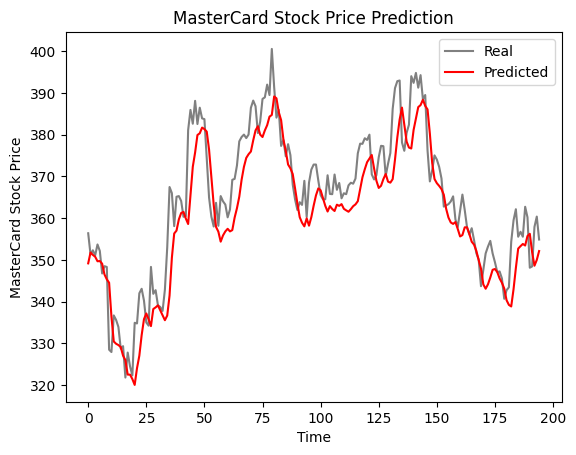

The root mean squared error is 7.70.


In [28]:
def plot_predictions(test, predicted):
    # This function takes in two arguments:
    # 'test' represents the real stock price values (true values),
    # 'predicted' represents the predicted stock price values by the model.

    # Plotting the real stock prices in gray color
    plt.plot(test, color="gray", label="Real")
    # Plotting the predicted stock prices in red color
    plt.plot(predicted, color="red", label="Predicted")

    # Set the title of the plot
    plt.title("MasterCard Stock Price Prediction")

    # Label the x-axis as 'Time' (since the data is over time)
    plt.xlabel("Time")

    # Label the y-axis as 'MasterCard Stock Price' (the variable being predicted)
    plt.ylabel("MasterCard Stock Price")

    # Show the legend to differentiate between real and predicted values
    plt.legend()

    # Display the plot
    plt.show()


def return_rmse(test, predicted):
    # This function calculates and prints the Root Mean Squared Error (RMSE) between the actual and predicted stock prices.

    # Use numpy to compute the RMSE, which gives an indication of the prediction accuracy
    # RMSE is calculated as the square root of the mean squared error (MSE).
    rmse = np.sqrt(mean_squared_error(test, predicted))

    # Print the RMSE value with two decimal places for clarity
    print("The root mean squared error is {:.2f}.".format(rmse))

# Call the plot_predictions function to visualize the real vs predicted stock prices
plot_predictions(test_set, predicted_stock_price)

# Call the return_rmse function to calculate and print the RMSE for the predictions
return_rmse(test_set, predicted_stock_price)


##**4. GRU Model**

The GRU architecture is similar to the LSTM (Long Short-Term Memory) model but simpler and faster.
1. **Gates**: GRU has only two main gates that control the flow of information:
- **Update Gate**: Decides how much of the previous information (memory) should be kept and how much should be replaced with new information. It’s like deciding how much of the past you want to remember and how much to forget.
- **Reset Gate**: Decides how much of the previous memory should be discarded when considering the new input. It helps decide what past information should be ignored when making new predictions.
2. **Memory Update**: GRU combines the new input with the memory from previous steps, using the update and reset gates. It keeps important past information and adds new insights from the current data.
3. **Output**: The updated memory is then used to make predictions or output decisions, such as predicting the next value in a sequence.

The GRU model is efficient because it simplifies the process compared to LSTM models, while still being able to capture important patterns in sequential data.

Unlike LSTM, GRU does not have cell state Ct. It only has a hidden state ht, and due to the simple architecture, GRU has a lower training time compared to LSTM models. The GRU architecture is simpler as it takes input x(t) and the hidden state from the previous timestamp h(t-1) and outputs the new hidden state h(t).

<img src ="https://cdn-images-1.medium.com/max/1500/1*zFhmhw_SZcX4kUVQH-z2aw.jpeg">

We are going to keep everything the same and just replace the LSTM layer with the GRU layer so we can compare the results. The model structure contains a single GRU layer with 125 units and an output layer.


###**4.1 Build the Model**

In [30]:
from tensorflow.keras import Input

model_gru = Sequential()

# Define the input shape using the Input() layer explicitly
model_gru.add(Input(shape=(n_steps, features)))  # n_steps: number of time steps, features: number of features at each time step

# Add GRU layer
model_gru.add(GRU(units=125, activation="tanh"))

# Add Dense output layer
model_gru.add(Dense(units=1))

# Compile the model
model_gru.compile(optimizer="RMSprop", loss="mse", metrics=["accuracy"])

# Print the model summary
model_gru.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                          │ (None, 125)                 │          48,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │             126 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,126 (187.99 KB)

 Trainable params: 48,126 (187.99 KB)

 Non-trainable params: 0 (0.00 B)

###**4.2 Train the Model**

In [37]:
model_gru.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.0000e+00 - loss: 1.7968e-04 - val_accuracy: 0.0042 - val_loss: 9.8848e-04
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.0000e+00 - loss: 1.6849e-04 - val_accuracy: 0.0042 - val_loss: 9.6373e-04
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.0000e+00 - loss: 1.5904e-04 - val_accuracy: 0.0042 - val_loss: 9.6854e-04
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.0000e+00 - loss: 1.5864e-04 - val_accuracy: 0.0042 - val_loss: 9.6619e-04
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.0000e+00 - loss: 1.5768e-04 - val_accuracy: 0.0042 - val_loss: 9.6401e-04
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.0000e+00 - loss: 1.5672e-04 - val_accuracy: 0.0042 - val_loss: 9.6192e-04
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.0000e+00 - loss: 1.5582e-04 - val_accuracy: 0.0042 - val_loss: 9.5985e-04
Epoch 8/50
30/30 ━━━━━━━━━

###**4.3 Run the Model on the Test Set**

In [32]:
GRU_predicted_stock_price = model_gru.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


###**4.4 Plot Predictions vs. Actual Values from the Test Set**

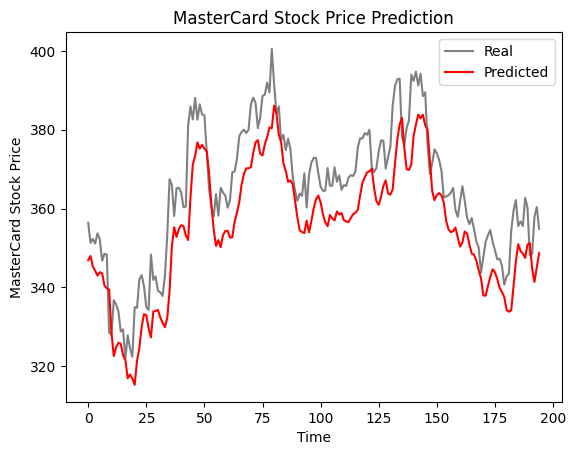

The root mean squared error is 10.85.


In [33]:
plot_predictions(test_set, GRU_predicted_stock_price)
return_rmse(test_set,GRU_predicted_stock_price)

**Your Task**: Which model performs better? What could be the reason? Record your thoughts below, then read on.

The difference in RMSE (Root Mean Squared Error) between the GRU and LSTM models could be due to several factors:

**1. Model Complexity:**

LSTM has a more complex architecture compared to GRU. Its three gates allow it to better capture long-term dependencies in the data. As a result, it may perform better at modeling sequential data, especially if the data has complex patterns or long-term relationships.
GRU is simpler and has only two gates (update and reset), which can make it faster and easier to train but potentially less effective at capturing long-term dependencies.

**2. Data Characteristics:**

Our data may benefit more from the LSTM’s ability to handle long-term dependencies, especially since they  contain complex temporal relationships and trends over a long period. LSTM might be able to capture these patterns better. If the data is simpler or doesn't have many long-term dependencies, GRU may be sufficient, but it might not perform as well as LSTM.

**3. Hyperparameters:**

Differences in model performance can also be influenced by the choice of hyperparameters (e.g., number of units, learning rate, batch size). Even slight differences in how the models are trained can result in significant changes in performance.
The GRU model might need further tuning in terms of the number of units, learning rate, or other training parameters to perform better.

**4. Training and Optimization:**

The optimizer (e.g., RMSprop) and training process for each model might be influencing the RMSE. LSTM models are generally more stable and easier to train for certain types of tasks, while GRU models might require additional tuning.

**5. Overfitting or Underfitting:**

If either model is overfitting or underfitting the training data, this can lead to a higher RMSE on the test set. You might want to check the validation loss and the generalization ability of the models to determine if this is the case.

##**5. Exercise**
Tune the LSTM and the GRU processes such that they produce near identical performance. You can adjust any parameter you like, including training/ test set size, input size (aka number of features), hyperparameters, activation functions--anything. Copy your code below:

In [ ]:
# Copy the tuned LSTM code here

In [ ]:
# Copy the tuned GRU code here